# INVESTIGATING AMAZON’S CUSTOMER SATISFACTION USING SENTIMENT ANALYSIS WITH TRANSFORMER MODELS


## INTRODUCTION

This notebook provides a comprehensive overview of the analysis performed on the customer review data scrapped from Amazon's e-commerce platform and how the analysis helps to understand customer satisfaction. It looks into the examination of the data, the exploratory data analysis results as well as the findings from the sentiment analysis performed using the lexicon-based approach and NLP transformers. It also highlights the key trends, patterns, and significant findings that emerged from the sentiment analysis. 

## DATA PREPARATION AND PRE-PROCESSING

It is well known that data is always messy and dirty, hence the need for data cleaning. In the section, the customer review data is examined and cleaned dataset was clean, consistent, and ready for the subsequent sentiment analysis, which provides a good foundation for accurate and meaningful insights.

For this study, the period in consideration is 1 January 2018 to 31 December 2022. This timeframe was selected to capture the fall and rise in Amazon’s customer satisfaction score during those period of time. Hence, the 'amazon_reviews' data will be filtered to include only reviews within this timeframe.   

Now we will import the necessary libraries

In [9]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# load the review data
df = pd.read_csv('amazon_reviews.csv')

In [11]:
# check the shape of the data
df.shape

(10593, 6)

### Data Sampling

Now, we will create a new column called 'year' from the 'review_date' column. 

In [12]:
# extracting the year from the date column into another column called year
df['year'] = pd.DatetimeIndex(df['date']).year
df.head()

,item,review,date,rating,review_word,item_url,year
0,Alice in Wonderland (Disney Gold Classic Colle...,My dvd,"September 19, 2022",5.0,The movie was great,https://www.amazon.com/Alice-Wonderland-Disney...,2022
1,Alice in Wonderland (Disney Gold Classic Colle...,A true tale to follow,"January 31, 2019",5.0,The animation is quite clever and the story is...,https://www.amazon.com/Alice-Wonderland-Disney...,2019
2,Alice in Wonderland (Disney Gold Classic Colle...,Fast shipping,"August 16, 2022",5.0,Fast shipping. Good quality. Thank you,https://www.amazon.com/Alice-Wonderland-Disney...,2022
3,Alice in Wonderland (Disney Gold Classic Colle...,"A Fun, Cynical Ride","January 9, 2019",4.0,"More a cynical Disney film, the movie has no d...",https://www.amazon.com/Alice-Wonderland-Disney...,2019
4,Alice in Wonderland (Disney Gold Classic Colle...,A Disney Classic,"April 4, 2019",5.0,If you are a fan of Disney animation then you ...,https://www.amazon.com/Alice-Wonderland-Disney...,2019


In [13]:
# checking the range of years in the data
df.year.value_counts()

year
2024    1094
2023     819
2015     733
2014     694
2016     650
2013     625
2000     575
2019     559
2021     526
2017     526
2020     472
2022     451
2018     435
2012     285
2001     279
2005     275
2011     190
2007     184
2003     174
2004     167
2010     163
2006     155
2002     150
2009     149
2008     136
1999     117
1998      10
Name: count, dtype: int64

This shows that the data spans from 1998 to 2024.

The next step is to filter the data to only include reviews between 2018 and 2022

In [14]:
# we filter the data to include only the year 2018, 2019, 2020, 2021 and 2022
df = df[df['year'].isin([2018, 2019, 2020, 2021, 2022])]
df.head()

,item,review,date,rating,review_word,item_url,year
0,Alice in Wonderland (Disney Gold Classic Colle...,My dvd,"September 19, 2022",5.0,The movie was great,https://www.amazon.com/Alice-Wonderland-Disney...,2022
1,Alice in Wonderland (Disney Gold Classic Colle...,A true tale to follow,"January 31, 2019",5.0,The animation is quite clever and the story is...,https://www.amazon.com/Alice-Wonderland-Disney...,2019
2,Alice in Wonderland (Disney Gold Classic Colle...,Fast shipping,"August 16, 2022",5.0,Fast shipping. Good quality. Thank you,https://www.amazon.com/Alice-Wonderland-Disney...,2022
3,Alice in Wonderland (Disney Gold Classic Colle...,"A Fun, Cynical Ride","January 9, 2019",4.0,"More a cynical Disney film, the movie has no d...",https://www.amazon.com/Alice-Wonderland-Disney...,2019
4,Alice in Wonderland (Disney Gold Classic Colle...,A Disney Classic,"April 4, 2019",5.0,If you are a fan of Disney animation then you ...,https://www.amazon.com/Alice-Wonderland-Disney...,2019


In [15]:
# check the shape of the data after filtering
df.shape

(2443, 7)

This shows that from the original data of 10,593, there are 2443 reviews between 2018 and 2022

In [16]:
# value counts of the year column
df.year.value_counts()

year
2019    559
2021    526
2020    472
2022    451
2018    435
Name: count, dtype: int64

This shows that some years have more reviews than others. The year 2020 has the highest number of reviews, followed by 2019, 2018, 2021, and 2022. Therefore, we  will use random sampling to get 350 reviews from each year.

In [23]:
# the list of years to sample from
years = [2018, 2019, 2020, 2021, 2022]

# now we will create an empty list to store the sampled dataframes
sampled_dfs = []

# we will loop through each year and sample 350 reviews
for year in years:
    # Filter data for the current year
    year_df = df[df['year'] == year]
    
    # we will sample 350 reviews randomly
    sampled_year_df = year_df.sample(n=350)
    
    # The we append the sampled DataFrame to the list
    sampled_dfs.append(sampled_year_df)

# Now we join all sampled DataFrames into a single DataFrame
sampled_df = pd.concat(sampled_dfs, ignore_index=True)
sampled_df.head()

,item,review,date,rating,review_word,item_url,year
0,Molly Hatchet,as described,"September 11, 2018",5.0,as described,https://www.amazon.com/Molly-Hatchet/dp/B00000...,2018
1,Mary Poppins [VHS],"One of the best movie musicals ever, with grea...","June 10, 2018",5.0,The Blu-ray definition is superior to the DVD ...,https://www.amazon.com/Mary-Poppins-VHS-Julie-...,2018
2,Riddle Box,The joke's on you,"January 30, 2018",5.0,This album always takes me back to junior high...,https://www.amazon.com/Riddle-Box-Insane-Clown...,2018
3,Sky Is Crying,Buy!,"June 18, 2018",5.0,Stevie Ray was/is the best.,https://www.amazon.com/Crying-Stevie-Vaughan-D...,2018
4,Kid A,Five Stars,"January 15, 2018",5.0,very rare material :),https://www.amazon.com/Kid-Radiohead/dp/B00004...,2018


In [24]:
sampled_df.shape

(1750, 7)

In [25]:
# value counts of the year column
sampled_df.year.value_counts()

year
2018    350
2019    350
2020    350
2021    350
2022    350
Name: count, dtype: int64

Now, we will save the sampled data to a new CSV file.

In [ ]:
# save the sampled data to a csv file
sampled_df.to_csv('sampled_amazon_reviews.csv', index=False)

### Data Cleaning

The next step of the analysis is to load the sampled data for data cleaning.

In [26]:
# load the sampled data
df = pd.read_csv('sampled_amazon_reviews.csv')

In [27]:
# check the shape of the data
df.shape

(1750, 7)

In [28]:
# check the first few rows of the data
df.head()

,item,review,date,rating,review_word,item_url,year
0,Bushnell Powerview 16x50 Binocular,it would've been stupid to trash,"April 24, 2018",1,"so, these are the SECOND Bushnell Powerview 16...",https://www.amazon.com/Bushnell-131650-Powervi...,2018
1,Riddle Box,Crappie,"November 16, 2018",1,Crappie,https://www.amazon.com/Riddle-Box-Insane-Clown...,2018
2,Play,One Star,"January 26, 2018",1,"CD is defective, but my printer's defunct, so ...",https://www.amazon.com/Play-Moby/dp/B00000J6AG...,2018
3,Antichrist Superstar,Two Stars,"July 18, 2018",2,"I love Manson, but should have listened to all...",https://www.amazon.com/Antichrist-Superstar-Ma...,2018
4,Speakerboxxx / The Love Below,Wanted to like it,"April 25, 2018",2,well I thought that I would really like this c...,https://www.amazon.com/Speakerboxxx-Love-Below...,2018


The first data cleaning step is to remove any columns that are not relevant to the analysis.

In [30]:
# dropping the columns that are not relevant to this analysis
df = df.drop(['item', 'review', 'date', 'item_url'], axis = 1)
df.head()

,rating,review_word,year
0,1,"so, these are the SECOND Bushnell Powerview 16...",2018
1,1,Crappie,2018
2,1,"CD is defective, but my printer's defunct, so ...",2018
3,2,"I love Manson, but should have listened to all...",2018
4,2,well I thought that I would really like this c...,2018


The second step is to clean the data by removing any missing values and duplicates.

In [31]:
# checking for missing values
df.isnull().sum()

rating         0
review_word    0
year           0
dtype: int64

In [32]:
# checking for duplicates
df.duplicated().sum()

0

There are no missing values or duplicates in the data

Now, in the last step, we will convert the year column into datetime format

In [33]:
# convert year into a dt.year data type
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year

All data cleaning step have been successfully completed.

### Data Preprocessing

In this section, we will transform the data to make it ready for analysis. The first step is to encode the rating column into a binary column called sentiment. We will encode ratings 1, and 2 as negative (-1), rating 3 as neutral (0) and ratings 4 and 5 as positive(1).

In [36]:
# we will encode the rating to a -1, 0, 1 scale: 
df['rating_score'] = df['rating'].apply(lambda x: 1 if x > 3 else (0 if x == 3 else -1))

In [37]:
# examine the data
df.head()

,rating,review_word,year,rating_score
0,1,"so, these are the SECOND Bushnell Powerview 16...",2018,-1
1,1,Crappie,2018,-1
2,1,"CD is defective, but my printer's defunct, so ...",2018,-1
3,2,"I love Manson, but should have listened to all...",2018,-1
4,2,well I thought that I would really like this c...,2018,-1


In the next preprocessing step, we will create a function to clean the text data by removing special characters, numbers, and converting the text to lowercase. The function will also remove stopwords and perform lemmatization on the text data.

In [38]:
# import the necessary libraries
import re
import string
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [39]:
# creating a function to clean the text
def transform_text(text):

    #lower casing
    text=text.lower()

    #removing html tags
    pattern=re.compile('<.*?>')
    text=pattern.sub(r'', text)

    #removing urls
    pattern_url=re.compile(r'https?://\S+|www\.\S+')
    text=pattern_url.sub(r'', text)

    #remove apostrophes
    text=text.replace("’", "")

    # Removing new line characters (ensure proper spacing)
    text = re.sub(r'\n+', ' ', text)

    #removing new line characters
    text=text.replace('\n', ' ')

    #removing punctuations
    for char in string.punctuation:   ###punctuation_marks '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
        text=text.replace(char, '')

    #tokenization
    text=nltk.word_tokenize(text)

    #removing stop words
    new_text=[]

    for word in text:
        if word not in stopwords.words('english'):
            new_text.append(word)

    #stemming
    new_text_stem=[]
    for word in new_text:
        potter=PorterStemmer()
        word=potter.stem(word)
        new_text_stem.append(word)
   
    return ' '.join(new_text_stem)

Now we will apply the function to the review column

In [41]:
# we will apply the function to the review column
df['new_review_word'] = df['review_word'].apply(transform_text)
df.head()

,rating,review_word,year,rating_score,new_review_word
0,1,"so, these are the SECOND Bushnell Powerview 16...",2018,-1,second bushnel powerview 16 x 50 binocularsrig...
1,1,Crappie,2018,-1,crappi
2,1,"CD is defective, but my printer's defunct, so ...",2018,-1,cd defect printer defunct cant print return la...
3,2,"I love Manson, but should have listened to all...",2018,-1,love manson listen song first suck could send ...
4,2,well I thought that I would really like this c...,2018,-1,well thought would realli like cd wasnt one


The review_word column has been succesfully cleaned and transformed into new_review_word column.

## EXPLORATORY DATA ANALYSIS

After the customer review data has been cleaning and pre-processed, an exploratory data analysis was conducted to gain a better understanding of the data and to visually examine the relationships and patterns in the data. 

### Distribution of the ratings

The first step is to check the distribution of the ratings in the data. 

In [42]:
# check the value counts of the rating_score column
df['rating'].value_counts()

rating
5    1401
4     207
3      82
1      35
2      25
Name: count, dtype: int64

In [43]:
# check the distribution of the rating_score column
df.describe()

,rating,year,rating_score
count,1750.000000,1750.000000,1750.000000
mean,4.665143,2020.000000,0.884571
std,0.801576,1.414618,0.413248
min,1.000000,2018.000000,-1.000000
25%,5.000000,2019.000000,1.000000
50%,5.000000,2020.000000,1.000000
75%,5.000000,2021.000000,1.000000
max,5.000000,2022.000000,1.000000


The average rating is approximately 4., which suggests that, on average, customers are generally positive about the products being reviewed.

The standard deviation of 0.801576 suggests a moderate degree of variation in the ratings. This means that customer opinions vary slightly, with some ratings differing from the average.

The minimum rating is 1, while the maximum rating is 5. This shows that the dataset covers the entire range of ratings. This ensures a comprehensive analysis of sentiment, capturing the full range of possible ratings. Overall, this suggests a consistently high satisfaction across the dataset spanning from 2018 to 2022.

Now, we will visualize the distribution of the rating_score column using a plot. First, we will calculate the percentage of each rating_score category.

In [44]:
# converting the rating to a categorical variable
df['rating'] = df['rating'].astype('category')

# calculating the percentage of each rating
rating_counts = df['rating'].value_counts(normalize=True).sort_index() * 100
rating_counts

rating
1     2.000000
2     1.428571
3     4.685714
4    11.828571
5    80.057143
Name: proportion, dtype: float64

Now we will visualize the distribution using a bar plot.

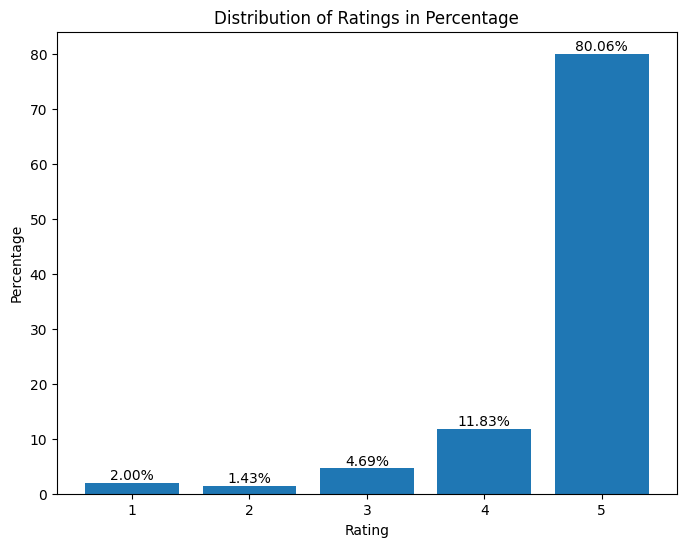

In [45]:
# calculating the percentage of each rating
rating_counts = df['rating'].value_counts(normalize=True).sort_index() * 100

# plotting the distribution of ratings as percentages
plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts)

# adding percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height,
        f'{height:.2f}%',
        ha='center', va='bottom'
    )

plt.title('Distribution of Ratings in Percentage')
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

Note: The code for the 'Add percentage labels on top of each bar' part was sourced from ChatGPT

The ratings are heavily skewed towards higher scores, with 80.06% of reviews receiving a perfect score of 5. A substantial portion of reviews also gave ratings of 4, comprising 11.83% of the dataset.Additionally, ratings of 3 and below are less common, with 3 receiving 4.69%, 2 receiving 1.43%, and 1 receiving 2.00% of the total ratings.

### Average rating per year

Now we will investigate the average rating score for each year in the dataset to see if there are any trends over time.

In [48]:
# convert the rating to a numerical variable
df['rating'] = df['rating'].astype(int)

# calculating the average rating per year
average_ratings_per_year = df.groupby('year')['rating'].mean()
average_ratings_per_year


year
2018    4.662857
2019    4.700000
2020    4.642857
2021    4.591429
2022    4.728571
Name: rating, dtype: float64

Let us now plot the average rating per year to see how it has been changing over the years.

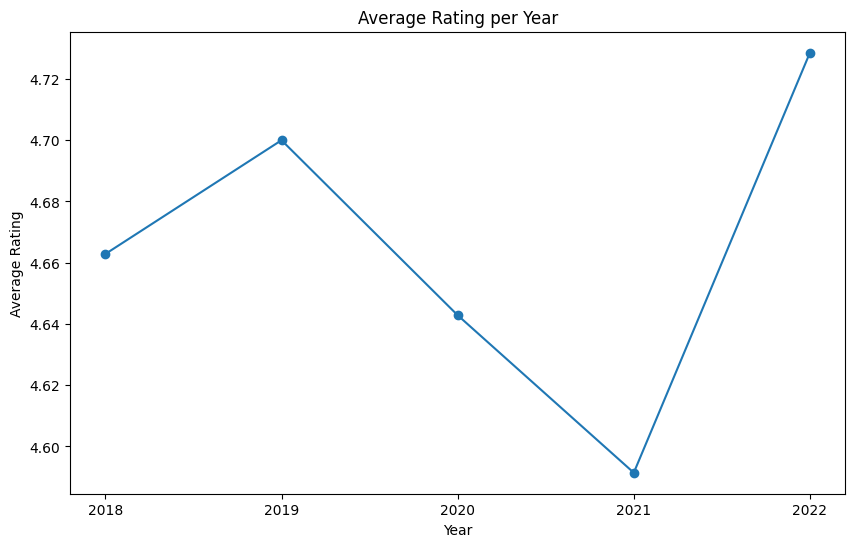

In [49]:
# we will calculate the average rating per year
average_ratings_per_year = df.groupby('year')['rating'].mean()

# plotting the average rating per year
plt.figure(figsize=(10, 6))
plt.plot(average_ratings_per_year.index, average_ratings_per_year, marker='o', linestyle='-')
plt.title('Average Rating per Year')
plt.xticks(average_ratings_per_year.index.astype(int))
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(False)
plt.show()



The average ratings per year show sharp variations from 4.59 in 2021 to 4.73 in 2022. The average rating was at the lowest in 2021, only to rise significantly in 2022. This is similar to the fluctuation observed in amazon's ASCI score during this period. The highest average rating was observed in 2022 which suggest suggesting a potential improvement in customer satisfaction or product quality. Overall, from 2018 to 2022, the average rating was above 4.5. This reflects a consistent positive feedback throughout the dataset.


### Most frequent words in reviews

The next step in this EDA is to examine the most common words in the reviews. This will help us understand the language used in the reviews and identify any patterns or trends.

In [50]:
df.head()

,rating,review_word,year,rating_score,new_review_word
0,1,"so, these are the SECOND Bushnell Powerview 16...",2018,-1,second bushnel powerview 16 x 50 binocularsrig...
1,1,Crappie,2018,-1,crappi
2,1,"CD is defective, but my printer's defunct, so ...",2018,-1,cd defect printer defunct cant print return la...
3,2,"I love Manson, but should have listened to all...",2018,-1,love manson listen song first suck could send ...
4,2,well I thought that I would really like this c...,2018,-1,well thought would realli like cd wasnt one


In [52]:
# now we will create a new column 'word_count' by counting the number of words in 'review_word'
df['word_count'] = df['review_word'].apply(lambda x: len(x.split()))
df.head()

,rating,review_word,year,rating_score,new_review_word,word_count
0,1,"so, these are the SECOND Bushnell Powerview 16...",2018,-1,second bushnel powerview 16 x 50 binocularsrig...,235
1,1,Crappie,2018,-1,crappi,1
2,1,"CD is defective, but my printer's defunct, so ...",2018,-1,cd defect printer defunct cant print return la...,19
3,2,"I love Manson, but should have listened to all...",2018,-1,love manson listen song first suck could send ...,17
4,2,well I thought that I would really like this c...,2018,-1,well thought would realli like cd wasnt one,18


In [53]:
# tokenize words and count frequencies
word_counts = Counter()
for review in df['new_review_word']:
    word_counts.update(review.split())

# we will now select top 20 most frequent words
top_words = dict(word_counts.most_common(10))
top_words

{'movi': 508,
 'album': 494,
 'great': 474,
 'one': 415,
 'love': 409,
 'cd': 314,
 'like': 302,
 'song': 275,
 'good': 274,
 'time': 272}

The next step is to visualize the top 10 most frequent words using a bar plot

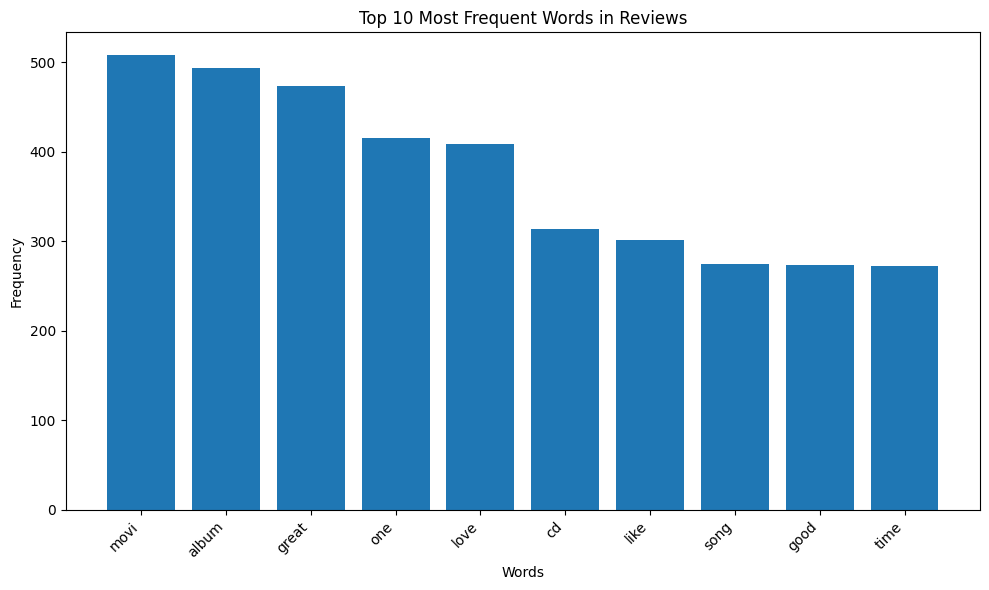

In [55]:
# plotting bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values())
plt.title('Top 10 Most Frequent Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The high frequency of positive words like 'great', 'like' and 'good' in the reviews further stresses the overall positive opinions and satisfaction expressed by customers during this period of time. 

### Word cloud of reviews

The next step is to create a word cloud to further visualize the most frequent words in the reviews   

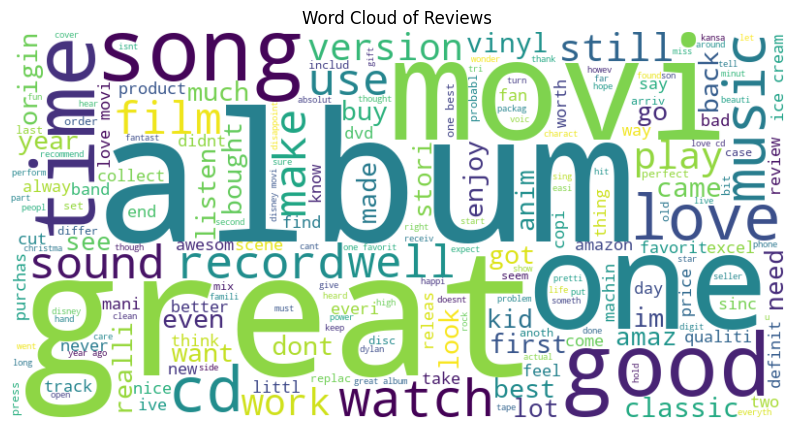

In [57]:
# we combine all reviews into a single string
text = ' '.join(df['new_review_word'])

# we generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# now we display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews')
plt.axis('off')
plt.show()

Great! We have successfully cleaned the data and performed some exploratory data analysis. We have also generated a word cloud to visualize the most frequent words in the reviews. In the next section, we will build a sentiment analysis model using the cleaned data.

## SENTIMENT ANALYSIS

This section outlines the implementation of Valence Aware Dictionary and sEntiment Reasoner (VADER) lexicon and two NLP transformers, namely the Bidirectional Encoder Representations from Transformers (BERT) and the  Robustly Optimized BERT Approach (ROBERTA) in the classification of customer's sentiments in reviews

### VADER (Valence Aware Dictionary and sEntiment Reasoner)

The first sentiment analysis will be performed using the Valence Aware Dictionary and sEntiment Reasoner (VADER), which is a lexicon specifically trained for opinion mining across various online platforms.

First things first, we will import the VADER sentiment analyzer from the NLTK library.

In [59]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

The VADER compound score will be obtained into a separate column called ‘vader_score’. This score was subsequently encoded into another column called ‘vader_class’ such that compound scores below 0 were classified as -1 (negative), score between 0 and 0.5 were classified as 0 (neutral), and scores above 0.5  were classified as 1 (positive). 

In [60]:
# creating  empty lists to store the scores and classes
vader_score = []
vader_class = []


for review in df.review_word:
    score = analyser.polarity_scores(review)
    compound_score = score.get('compound')
    vader_score.append(compound_score)
    if (compound_score < 0):
        vader_class.append(-1)
    elif (compound_score >= 0) and (compound_score < 0.5):
        vader_class.append(0)
    else:
        vader_class.append(1)
        
df['vader_score'] = vader_score
df['vader_class'] = vader_class

In [61]:
# we check the random rows in the data
df.sample(10)

,rating,review_word,year,rating_score,new_review_word,word_count,vader_score,vader_class
1320,5,I rented the movie last night but today it did...,2021,1,rent movi last night today allow watch left on...,81,-0.6331,-1
237,5,I used to have this and it's nice to have it a...,2018,1,use nice,12,0.4215,0
1549,5,Came from Australia with double the packaging ...,2022,1,came australia doubl packag heat summer near p...,41,0.9412,1
1527,5,thank you so much for both movies and i got bo...,2022,1,thank much movi got problem,16,-0.3400,-1
1722,5,"This one falls under the category of ""loved th...",2022,1,one fall categori love group music sinc day 1 ...,41,0.8692,1
1099,5,👌,2021,1,👌,1,0.0000,0
169,5,Great album by one of the greatest bands of al...,2018,1,great album one greatest band time messag vita...,23,0.8885,1
818,5,Worked a 80 to a 95% accuracy. It help me a lo...,2020,1,work 80 95 accuraci help lot understand we bor...,31,0.7424,1
1537,3,Package was open. I think the cd is ok but I d...,2022,0,packag open think cd ok dont like way handl,18,-0.2651,-1
1116,5,Love this product. Use it all the time. Nice a...,2021,1,love product use time nice sharp,11,0.7906,1


Now using the rating_score column as the true label and the vader_class column as the predicted label, we will calculate the confusion matrix, accuracy, precision, recall, and F1 score.

In [62]:
# we calculate accuracy, precision, and F1-score
report = classification_report(df['rating_score'], df['vader_class'], labels=[-1, 0, 1])
print(report)

              precision    recall  f1-score   support

          -1       0.20      0.55      0.29        60
           0       0.07      0.35      0.12        82
           1       0.96      0.70      0.81      1608

    accuracy                           0.68      1750
   macro avg       0.41      0.53      0.41      1750
weighted avg       0.89      0.68      0.76      1750



The model performs very well in predicting class 1, with high precision (0.96) and a decent recall (0.70).

The performance for classes -1 and 0 is poor, with very low precision (0.20 and 0.07, respectively) and moderate recall (0.55 and 0.35, respectively). This indicates that the model has difficulty distinguishing these classes accurately. The overall accuracy is 68%, which suggests the model is somewhat reliable overall but significantly biased towards the majority class (class 1).

Now, we will calculate the confusion matrix to evaluate the performance of the model.

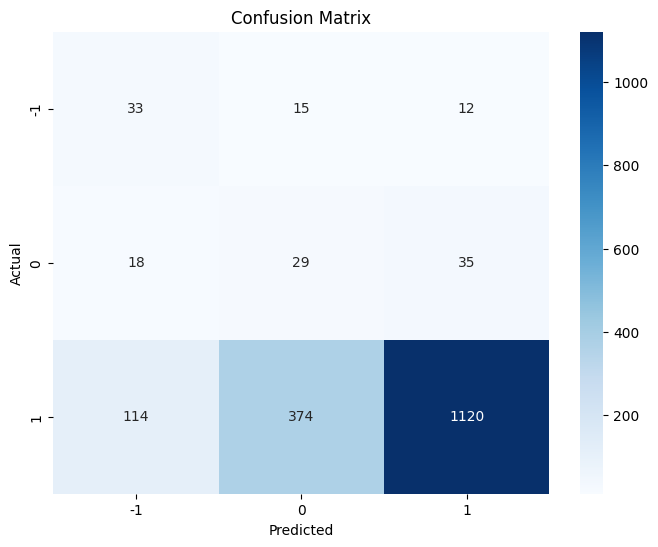

In [63]:
# we compute the confusion matrix
cm = confusion_matrix(df['rating_score'], df['vader_class'], labels=[-1, 0, 1])

# we create a DataFrame for the confusion matrix for better visualization
cm_df = pd.DataFrame(cm, index=['-1', '0', '1'], columns=['-1', '0', '1'])

# plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### RoBERTa (Robustly Optimized BERT approach)

The next sentiment analysis technique we will use is technique used in this study is the Robustly Optimized BERT Approach (RoBERTa) model. RoBERTa is a transformer-based model that is pre-trained on a large corpus of text data. We will use the Hugging Face Transformers library to load the pre-trained RoBERTa model and perform sentiment analysis on the Amazon reviews data. 

In [64]:
# importing the transformers library
from transformers import pipeline

Now, we will load the sentiment analysis pipeline using the ‘cardiffnlp/twitter-roberta-base-sentiment’ model from Hugging face. The model is suitable for English language and multilingual text classification tasks. The model predictions were encoded into a new column called ‘roberta_sentiment’, where negative reviews were represented as -1, neutral as 0, and positive reviews as 1.

In [65]:
# we load the RoBERTa sentiment-analysis pipeline
classifier = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", max_length=512, truncation=True)

# function to apply the classifier safely and handle exceptions
def get_sentiment(text):
    try:
        result = classifier(text)[0]['label']
        return result
    except RuntimeError as e:
        print(f"RuntimeError for text: {text[:50]}... - {e}")
        return None

# we apply the classifier to predict sentiment for each review
df['roberta_sentiment'] = df['review_word'].apply(get_sentiment)

# mapping RoBERTa sentiment labels to numerical values
sentiment_mapping = {'LABEL_0': -1, 'LABEL_1': 0, 'LABEL_2': 1}
df['roberta_sentiment'] = df['roberta_sentiment'].map(sentiment_mapping)

In [67]:
# checking the first few rows of the data
df.head()

,rating,review_word,year,rating_score,new_review_word,word_count,vader_score,vader_class,roberta_sentiment
0,1,"so, these are the SECOND Bushnell Powerview 16...",2018,-1,second bushnel powerview 16 x 50 binocularsrig...,235,-0.7715,-1,-1
1,1,Crappie,2018,-1,crappi,1,0.0000,0,0
2,1,"CD is defective, but my printer's defunct, so ...",2018,-1,cd defect printer defunct cant print return la...,19,-0.9354,-1,-1
3,2,"I love Manson, but should have listened to all...",2018,-1,love manson listen song first suck could send ...,17,0.5815,1,-1
4,2,well I thought that I would really like this c...,2018,-1,well thought would realli like cd wasnt one,18,0.3499,0,0


Now using the rating_score column as the true label and the roberta_sentiment column as the predicted label, we will calculate the confusion matrix, accuracy, precision, recall, and F1 score.

In [69]:
# we ensure the 'rating_score' column contains integers for proper comparison
df.loc[:, 'rating_score'] = df['rating_score'].astype(int)

#  we calculate and print the classification report
report = classification_report(df['rating_score'], df['roberta_sentiment'], labels=[-1, 0, 1])
print(report)


              precision    recall  f1-score   support

          -1       0.29      0.70      0.41        60
           0       0.08      0.22      0.12        82
           1       0.97      0.84      0.90      1608

    accuracy                           0.81      1750
   macro avg       0.45      0.59      0.48      1750
weighted avg       0.91      0.81      0.85      1750



 The Robustly Optimized BERT Approach (RoBERTa) model achieved an accuracy of 0.81. The model had a precision score of 0.97 and a recall of 0.84 on positive reviews and had a moderate performance on negative and neutral reviews. RoBERTa had a precision and recall score of 0.29 and 0.70 on negative reviews and a precision and recall score of 0.08 and 0.22 on neutral reviews respectively. The overall accuracy of 81% affirms the comparative advantage of RoBERTa over traditional lexicon-based methods. 

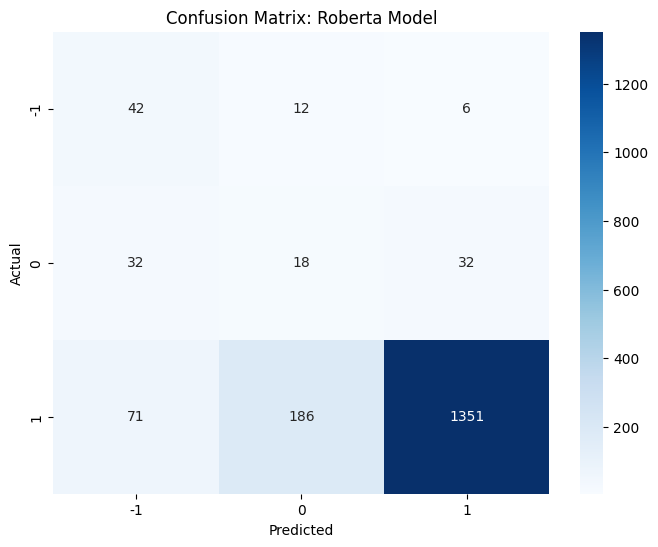

In [71]:
# Now, we compute the confusion matrix
cm = confusion_matrix(df['rating_score'], df['roberta_sentiment'], labels=[-1, 0, 1])

# A DataFrame for the confusion matrix for better visualization will be created
cm_df = pd.DataFrame(cm, index=['-1', '0', '1'], columns=['-1', '0', '1'])

# We plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Roberta Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### BERT - Bidirectional Encoder Representations from Transformers

BERT is a bi-directional sequence model as it processes sequential data by considering both left-to-right and right-to-left contexts. BERT was pre-traind on a large amount of unlabelled data, and can be fine-tuned for specific NLP tasks. It makes use of masked language modelling techniques, and like other NLP tranfomers, it relies on self-attention mechanism to capture contextual relationships within texts. 

The BERT model and tokenizer is the ‘nlptown/bert-base-multilingual-uncased-sentiment’ model from Hugging face, which has been fine-tuned for sentiment analysis tasks on product reviews in different languages. This model predicts the sentiment of reviews as a star rating ranging from 1 to 5. These predictions were encoded into a new column called ‘bert_sentiment’, where 1-star and 2-star ratings were represented as -1 (negative) , 3-star rating as 0 (neutral) , and 4-star and 5-star as 1 (positive). 

In [72]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import pandas as pd

# loading the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# we create a pipeline for sentiment analysis using the loaded model and tokenizer
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, max_length=512, truncation=True)

# function to apply the classifier safely and handle exceptions
def get_sentiment(text):
    try:
        result = classifier(text)[0]['label']
        return result
    except RuntimeError as e:
        print(f"RuntimeError for text: {text[:50]}... - {e}")
        return None


# now we apply the classifier to predict sentiment for each review
df['bert_sentiment'] = df['review_word'].apply(get_sentiment)


# The sentiment labels for this specific model might be different; adjust the mapping as needed
sentiment_mapping = {'1 star': -1, '2 stars': -1, '3 stars': 0, '4 stars': 1, '5 stars': 1}
df['bert_sentiment'] = df['bert_sentiment'].map(sentiment_mapping)



In [73]:
df.sample(2)

,rating,review_word,year,rating_score,new_review_word,word_count,vader_score,vader_class,roberta_sentiment,bert_sentiment
509,5,This movie is amazing and Elizabeth Taylor as ...,2019,1,movi amaz elizabeth taylor katherin never grow...,74,0.9451,1,1,1
304,3,I have a daughter who is curious about the Ali...,2018,0,daughter curiou alic wonderland stori charact ...,294,0.9929,1,1,0


Now using the rating_score column as the true label and the bert_sentiment column as the predicted label, we will calculate the confusion matrix, accuracy, precision, recall, and F1 score.

In [74]:
# Ensure the 'rating_score' column contains integers for proper comparison
df.loc[:, 'rating_score'] = df['rating_score'].astype(int)

# Calculate and print the classification report
report = classification_report(df['rating_score'], df['bert_sentiment'], labels=[-1, 0, 1])
print(report)


              precision    recall  f1-score   support

          -1       0.31      0.92      0.46        60
           0       0.29      0.48      0.36        82
           1       0.99      0.89      0.94      1608

    accuracy                           0.87      1750
   macro avg       0.53      0.76      0.59      1750
weighted avg       0.94      0.87      0.89      1750



The Bidirectional Encoder Representations from Transformers (BERT) model had the best performance, achieving an accuracy of 0.87. The model recorded a precision of 0.99 and a recall of 0.89 on positive reviews. BERT also had a moderate performance on negative and neutral reviews. The precision and recall score for negative reviews was 0.31 and 0.92, and the precision and recall score on neutral reviews are 0.08 and 0.22 respectively. 

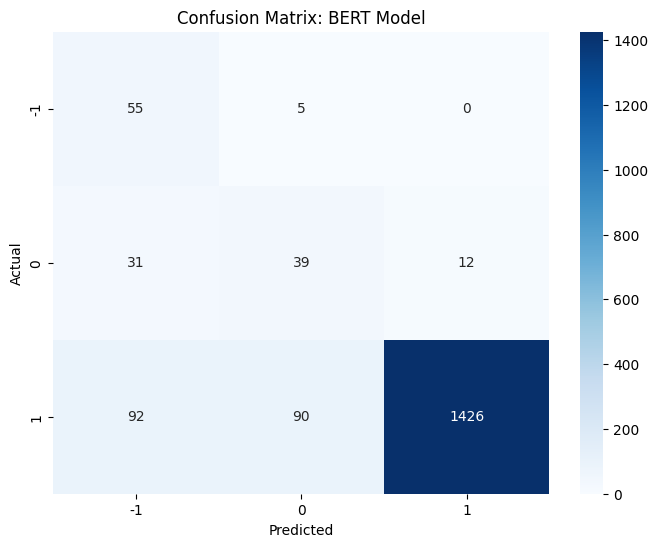

In [75]:
# Compute the confusion matrix
cm = confusion_matrix(df['rating_score'], df['bert_sentiment'], labels=[-1, 0, 1])

# Create a DataFrame for the confusion matrix for better visualization
cm_df = pd.DataFrame(cm, index=['-1', '0', '1'], columns=['-1', '0', '1'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: BERT Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Investigating false postives

In sentiment analysis for customer satisfaction, the most detrimental error is a false negative, where a review with a negative sentiment is incorrectly classified as positive (FNneg,pos). This type of misclassification  can result in unresolved customer issues, damage to the brand’s reputation, customer iteration and missed opportunity for product and service improvememts. 

To investigate these false positives, we wil filter the dataset to remove irrelevant columns

In [76]:
# filter the data to only include the review_word, rating_score, vader_class, roberta_sentiment, and bert_sentiment columns
results = df[['review_word', 'rating_score', 'vader_class', 'roberta_sentiment', 'bert_sentiment']]
results.head()

,review_word,rating_score,vader_class,roberta_sentiment,bert_sentiment
0,"so, these are the SECOND Bushnell Powerview 16...",-1,-1,-1,-1
1,Crappie,-1,0,0,-1
2,"CD is defective, but my printer's defunct, so ...",-1,-1,-1,-1
3,"I love Manson, but should have listened to all...",-1,1,-1,-1
4,well I thought that I would really like this c...,-1,0,0,-1


#### False Positives: VADER

Here we will investigate cases where the VADER model classified a review as positive while the actual rating was negative.

In [78]:
# filter the data to see where rating_score = -1 and vader_class = 1
d = results[(results['rating_score'] == -1) & (results['vader_class'] == 1)]
d.head()

,review_word,rating_score,vader_class,roberta_sentiment,bert_sentiment
3,"I love Manson, but should have listened to all...",-1,1,-1,-1
8,Purchased item and package was in excellent co...,-1,1,1,-1
704,Couldn’t get into it for some reason… I wish I...,-1,1,-1,-1
706,What I did not like as that Moby play and Moby...,-1,1,-1,-1
711,This is a great album; one of my favorites. Ho...,-1,1,-1,-1


In [79]:
# check the number of false positives
d.shape

(12, 5)

There are 12 false positives when comparing the rating_score and vader_class columns.

Let us take a closer look at one of the cases where the Vader model predicted a positive sentiment while the actual rating was negative.

In [136]:
d.review_word.iloc[8]

'Love this album, but rated it with 2 stars because the album cover was delivered bent at the corner. As someone who collects vinyl albums, this is deeply disappointing. I wish the shipper would have taken more care.'

In [135]:

score1 = analyser.polarity_scores('Love this album, but rated it with 2 stars because the album cover was delivered bent at the corner. As someone who collects vinyl albums, this is deeply disappointing. I wish the shipper would have taken more care.')
score1

    

{'neg': 0.099, 'neu': 0.666, 'pos': 0.235, 'compound': 0.7627}

#### False Positives: Roberta Model

Here we will investigate cases where the Roberta model classified a review as positive while the actual rating was negative.

In [80]:
# filter the data to see where rating_score = -1 and roberta_sentiment = 1
e = results[(results['rating_score'] == -1) & (results['roberta_sentiment'] == 1)]
e.head()

,review_word,rating_score,vader_class,roberta_sentiment,bert_sentiment
8,Purchased item and package was in excellent co...,-1,1,1,-1
1051,The story line was funny and interesting. The ...,-1,1,1,-1
1060,"Decades ago I had this ""album"" and really enjo...",-1,1,1,-1
1062,"I'm a Beastie Boys fan, to be sure. I collecte...",-1,1,1,0
1063,I love this album and when I saw Craft Recordi...,-1,-1,1,-1


In [81]:
# investigate the false positives
e.shape

(6, 5)

There are 3 false positives in the data.

#### False Positive: BERT Model

Here we will investigate cases where the BERT model classified a review as positive while the actual rating was negative.

In [83]:
# filter the data to see where rating_score = -1 and bert_sentiment = 1
f = results[(results['rating_score'] == -1) & (results['bert_sentiment'] == 1)]
f.head()

,review_word,rating_score,vader_class,roberta_sentiment,bert_sentiment


The BERT model had no false positives. This is a good sign that the model is performing well. 

## CONCLUSION


The exploratory data analysis revealed that customers’ sentiments on the e-commerce platform within the period of this study was predominantly positive, with about 91% of the reviews having a positive sentiment. This answers the first research question of this study, indicating a high level of satisfaction from Amazon’s customer base. This infers that customers were pleased with their purchases during the period of time. 

Secondly, there was significant correlation observed between the trend of customers sentiments on the e-commerce platform over time and the fluctuation in Amazon’s  ASCI score over the same period. The trend of customer sentiments and the average ASCI score experienced a great decline in 2021, only in experience a sharp rise in 2022. This proffers an answer to the second research question of this research, suggesting that customer sentiment is a reliable indicator of customer satisfaction trends captured by the ACSI score.

The sentiment analysis performed using the Lexicon-based approach and NLP transformers suggest that NLP transformers have superior contextual understanding and classification accuracy compared to lexicon-based approaches. This is a because the lexicons-based approach considers individual words and struggles with context and relationship within words. Hence, they fail to capture subtle sentiments such as sarcasms, ironies, and tones in a body of text. With these three conclusions, this research successfully achieved its aim and provided answers to the three research questions of this study.

Bibliography

https://www.analyticsvidhya.com/blog/2023/03/analysis-of-amazon-review-using-vader-roberta-and-nltk/

https://github.com/Kunal-Kumar-Das191049/Sentimental-Analysis-of-Amazon-Reviews/blob/master/Code%20and%20Datasets/
Amazon%20review%20sentimental%20analysis%20New.ipynb

https://www.kaggle.com/code/idevji1/sentiment-analysis-of-alexa-reviews-using-vader

https://www.kaggle.com/code/mayurdushetwar/amazon-reviews-sentiment-vader-roberta

https://www.youtube.com/watch?v=QpzMWQvxXWk&list=PLSLB_XUBsqT6CgZ_c04yZZFWvYbggIJ3A

https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment
